<a href="https://colab.research.google.com/github/VasuPatel001/CS-230/blob/main/CS230_Keras_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS 230 Project work: 
This project analyzes the delta increase in electricity consumption from the extreme weather data in California. 

We will begin by importing our dataset. 

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import keras
import numpy as np
import os
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/Shareddrives/CS_229_project/Electricity_Consumption_data/dataset.csv', usecols = ['AWND','PRCP','TAVG','TMIN','TMAX','CLASS_2']) #'SNWD' 

In [ ]:
dataset

,AWND,PRCP,TAVG,TMAX,TMIN,CLASS_2
0,6.581053,0.033469,77.408226,90.762660,65.968350,3
1,6.805790,0.076531,76.123030,90.015770,64.507890,3
2,7.076316,0.037755,74.880130,88.255520,63.290222,2
3,6.569474,0.112245,73.870660,87.555210,62.066246,2
4,7.417368,0.071633,71.583595,84.826500,60.249210,2
...,...,...,...,...,...,...
2331,4.100555,0.002041,49.119740,61.213593,40.197410,1
2332,4.106471,0.021042,50.217533,59.652596,42.461040,1
2333,4.422353,0.018667,49.600650,59.207790,41.918830,1
2334,4.894118,0.004545,48.342020,59.690556,39.638435,0


We now have imported our dataset. We move into creating our layers and then working through our layers. 

In [ ]:
#split train & test dataset
train = dataset.sample(frac=0.95) #random_state=0
test = dataset.drop(train.index)
print(train.shape, test.shape)

(2219, 6) (117, 6)


One hot encoding for Train & Test dataset

In [ ]:
#Create one-hot encoding for TRAIN dataset
existing_vals = np.unique(train['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_train = np.array([mapping[y] for y in train['CLASS_2'].values])
y_train = np_utils.to_categorical(y_train)
print(y_train.shape)
y_train

(2219, 5)


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#Create one-hot encoding for TEST dataset
existing_vals = np.unique(test['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_test = np.array([mapping[x] for x in test['CLASS_2'].values])
y_test = np_utils.to_categorical(y_test)

print(y_test.shape)
y_test

(117, 5)


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [ ]:
sns.pairplot(train[['CLASS_2', 'AWND', 'PRCP', 'SNWD', 'TAVG', 'TMIN', 'TMAX']], diag_kind='kde')

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,2102.0,6.519634,1.906891,2.522857,5.122941,6.461944,7.568333,14.142222
PRCP,2211.0,0.088104,0.254537,0.000000,0.000000,0.006122,0.047115,3.456250
TAVG,2211.0,55.301625,17.893704,0.000000,45.580130,55.825950,68.889085,109.000000
TMAX,2211.0,67.186107,16.061513,14.368421,54.529084,67.000000,81.899015,98.060320
TMIN,2211.0,45.657361,11.622738,12.100000,37.513959,44.870663,55.507496,78.000000
CLASS_2,2219.0,1.290671,0.926398,0.000000,1.000000,1.000000,2.000000,4.000000


In [ ]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,112.0,6.549851,1.871273,2.972857,5.298865,6.519706,7.806805,12.339444
PRCP,117.0,0.076639,0.155709,0.000000,0.000408,0.008163,0.056735,0.782917
TAVG,117.0,55.282767,17.697591,0.000000,46.212220,55.444443,68.885710,95.000000
TMAX,117.0,67.332090,16.207734,25.605263,54.705128,67.000000,81.873020,96.248405
TMIN,117.0,46.428440,11.736354,13.000000,38.603176,45.443730,55.942123,74.236840
CLASS_2,117.0,1.290598,1.009095,0.000000,1.000000,1.000000,2.000000,4.000000


Train and test data cleaning

In [ ]:
#train data normalization
train_features = train.copy()
train_labels = train_features.pop('CLASS_2')
train_labels

378     3
1345    0
1321    1
1480    1
2219    3
       ..
1231    1
1035    1
2178    3
2072    1
1730    0
Name: CLASS_2, Length: 2219, dtype: int64

In [ ]:
#test data normalization
test_features = test.copy()
test_labels = test_features.pop('CLASS_2')
test_labels

35      3
51      2
58      4
101     2
108     1
       ..
2239    3
2242    2
2266    2
2281    1
2304    1
Name: CLASS_2, Length: 117, dtype: int64

In [ ]:
print(y_train)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
# train_features.shape
x_train_clean = train_features.fillna(0).dropna()

In [ ]:
#test feature cleaning 
x_test_clean = test_features.fillna(0).dropna()
x_test_clean

,AWND,PRCP,TAVG,TMAX,TMIN
35,5.510526,0.002041,70.357600,84.490510,57.310127
51,6.275789,0.000000,70.155556,84.968254,57.701588
58,6.310000,0.002041,76.155556,90.707940,62.888890
101,5.967895,0.005714,68.885710,82.628570,57.120636
108,6.358947,0.546735,58.917460,67.000000,52.463493
...,...,...,...,...,...
2239,8.264117,0.019149,71.077670,83.404530,59.611652
2242,6.235882,0.004255,67.135925,80.822010,55.110030
2266,5.418334,0.000000,71.154340,86.845660,57.784565
2281,8.894117,0.032609,54.893547,66.161290,45.558064


Normalizing our train & test clean data set

In [ ]:
#normalize x_train_clean 
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train_clean)
x_train_norm = normalizer(x_train_clean)
x_train_norm.shape

TensorShape([2219, 5])

In [ ]:
#normalize x_test_clean
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_test_clean)
x_test_norm = normalizer(x_test_clean)
x_test_norm.shape

TensorShape([117, 5])

Create model

In [ ]:
#Import CLASS_2es
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

#Model Definition
model = Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


In [ ]:
#Configure model training
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # 

Model Fit

In [ ]:
#train model
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0005)
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs=500)

Epoch 1/500
63/63 [==============================] - 1s 6ms/step - loss: 1.4173 - accuracy: 0.4827 - val_loss: 1.1031 - val_accuracy: 0.5315
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 1.0905 - accuracy: 0.5714 - val_loss: 0.8847 - val_accuracy: 0.6396
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.6164 - val_loss: 0.8011 - val_accuracy: 0.6667
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.9449 - accuracy: 0.6029 - val_loss: 0.7674 - val_accuracy: 0.6802
Epoch 5/500
63/63 [==============================] - 0s 3ms/step - loss: 0.8885 - accuracy: 0.6279 - val_loss: 0.7491 - val_accuracy: 0.6712
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.6179 - val_loss: 0.7478 - val_accuracy: 0.6847
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.6309 - val_loss: 0.7364 - val_accuracy: 0.6892
Epoch 8/500
6

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


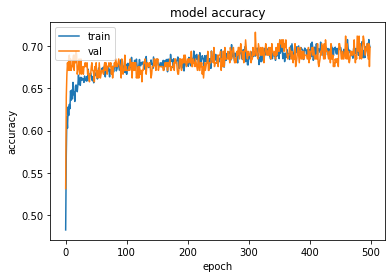

In [ ]:
#plot training accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

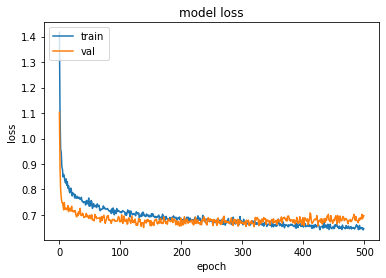

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model predict

In [ ]:
#predict on testing dataset
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.0008)
y_pred = model.predict(x_test_norm)
y_pred
#print('y_pred',y_pred)
y_pred.shape, y_test.shape
y_test = y_test.argmax(axis=-1)
print('y_test', y_test)
y_pred = y_pred.argmax(axis=-1)
print('y_pred',y_pred)


y_test [3 2 4 2 1 1 1 1 1 1 0 1 1 1 1 2 2 3 3 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 2
 3 4 4 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 3 4 3 1 0 1 1 1 0 0 0 0 0 0 1
 1 1 2 3 2 2 1 1 0 1 0 0 0 0 1 0 1 0 2 3 2 3 1 1 1 0 0 0 0 0 2 1 2 2 2 2 2
 3 3 2 2 1 1]
y_pred [2 2 3 2 1 1 1 1 1 1 1 1 0 1 1 2 1 2 3 2 2 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 2
 3 4 4 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 3 2 1 1 1 1 0 1 1 1 1 1 1 1 1 3 3 2 2 1 1 1 1 1 1 1 0 2 1 3 3 3 3 3
 3 3 2 2 1 1]


In [ ]:
#Compute Recall, precision, f1_score
# from sklearn.metrics import precision_score , recall_score

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.11      0.04      0.06        24
           1       0.63      0.85      0.72        54
           2       0.82      0.58      0.68        24
           3       0.50      0.73      0.59        11
           4       1.00      0.50      0.67         4

    accuracy                           0.61       117
   macro avg       0.61      0.54      0.55       117
weighted avg       0.56      0.61      0.57       117



In [ ]:
#Compute confusion matrix using accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
test_acc = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[ 1, 23,  0,  0,  0],
       [ 8, 46,  0,  0,  0],
       [ 0,  4, 14,  6,  0],
       [ 0,  0,  3,  8,  0],
       [ 0,  0,  0,  2,  2]])

Class=3, n=1203 (20.000%)
Class=2, n=1203 (20.000%)
Class=1, n=1203 (20.000%)
Class=4, n=1203 (20.000%)
Class=0, n=1203 (20.000%)


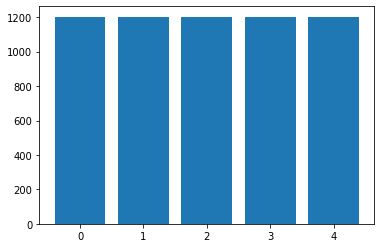

In [ ]:
#SMOTE Implementation 
#Link: https://machinelearningmastery.com/multi-class-imbalanced-classification/ 

# example of oversampling a multi-class classification dataset
from pandas import read_csv
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# define the dataset location
url = '/content/drive/Shareddrives/CS_229_project/Electricity_Consumption_data/dataset.csv'
# load the csv file as a data frame
df = read_csv(url, usecols=['AWND','PRCP','TAVG','TMIN','TMAX','CLASS_2'])
df = df.fillna(0).dropna()
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=3, n=247 (4.106%)
Class=0, n=371 (6.168%)
Class=1, n=1149 (19.102%)
Class=2, n=417 (6.933%)
Class=4, n=35 (0.582%)


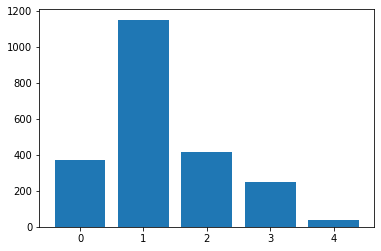

In [ ]:
# summarize distribution
counter = Counter(train_labels)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#Latest X & y values
print('X',X.shape)
print('y', y.shape)
#print('X:',X)
#print('y:',y)
#type(X)
type(y)
n = X.shape[0]

X (6015, 5)
y (6015,)


In [ ]:
#Concetanate X & y
y = np.reshape(y, (n,1))
print('y',y)
data = np.concatenate((X, y), axis=1)
print(data)

y [[3]
 [3]
 [2]
 ...
 [4]
 [4]
 [4]]
[[6.58105300e+00 3.34693860e-02 7.74082260e+01 9.07626600e+01
  6.59683500e+01 3.00000000e+00]
 [6.80578950e+00 7.65306100e-02 7.61230300e+01 9.00157700e+01
  6.45078900e+01 3.00000000e+00]
 [7.07631600e+00 3.77551020e-02 7.48801300e+01 8.82555200e+01
  6.32902220e+01 2.00000000e+00]
 ...
 [5.40856159e+00 1.76937391e-03 7.67178621e+01 9.23969295e+01
  6.25607612e+01 4.00000000e+00]
 [6.62582072e+00 7.73094667e-04 7.60397488e+01 9.08063850e+01
  6.35384329e+01 4.00000000e+00]
 [5.35608123e+00 2.74300844e-04 8.06906696e+01 9.63738705e+01
  6.62492523e+01 4.00000000e+00]]


In [ ]:
#Convert 'data' to pandas dataframe
dataset_s = pd.DataFrame(data, columns=['AWND','PRCP','TAVG','TMIN','TMAX','CLASS_2'])
dataset_s

,AWND,PRCP,TAVG,TMIN,TMAX,CLASS_2
0,6.581053,0.033469,77.408226,90.762660,65.968350,3.0
1,6.805790,0.076531,76.123030,90.015770,64.507890,3.0
2,7.076316,0.037755,74.880130,88.255520,63.290222,2.0
3,6.569474,0.112245,73.870660,87.555210,62.066246,2.0
4,7.417368,0.071633,71.583595,84.826500,60.249210,2.0
...,...,...,...,...,...,...
6010,6.181162,0.000852,80.295436,95.779341,65.792416,4.0
6011,6.220058,0.010941,78.999983,93.647921,66.704280,4.0
6012,5.408562,0.001769,76.717862,92.396929,62.560761,4.0
6013,6.625821,0.000773,76.039749,90.806385,63.538433,4.0


In [ ]:
#split train & test dataset
train_s = dataset_s.sample(frac=0.95) #random_state=0
test_s = dataset_s.drop(train_s.index)
print(train_s.shape, test_s.shape)

(5714, 6) (301, 6)


In [ ]:
#Create one-hot encoding for TRAIN dataset
existing_vals = np.unique(train_s['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_train_s = np.array([mapping[y] for y in train_s['CLASS_2'].values])
y_train_s = np_utils.to_categorical(y_train_s)
print(y_train_s.shape)
y_train_s

(5714, 5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Create one-hot encoding for TEST dataset
existing_vals = np.unique(test_s['CLASS_2'].values)
mapping = {val: idx for idx, val in enumerate(existing_vals)}
y_test_s = np.array([mapping[x] for x in test_s['CLASS_2'].values])
y_test_s = np_utils.to_categorical(y_test_s)

print(y_test_s.shape)
y_test_s

(301, 5)


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#train data normalization
train_features_s = train_s.copy()
train_labels_s = train_features_s.pop('CLASS_2')
train_labels_s

1306    0.0
1226    1.0
1310    1.0
4374    3.0
4484    3.0
       ... 
2885    0.0
2465    0.0
2616    0.0
4651    3.0
82      3.0
Name: CLASS_2, Length: 5714, dtype: float64

In [ ]:
#test data normalization
test_features_s = test_s.copy()
test_labels_s = test_features_s.pop('CLASS_2')
test_labels_s

1       3.0
5       2.0
8       2.0
15      2.0
53      2.0
       ... 
5973    4.0
5997    4.0
6002    4.0
6003    4.0
6010    4.0
Name: CLASS_2, Length: 301, dtype: float64

In [ ]:
#Clean x_train_s & x_test_s
x_train_clean_s = train_features_s.fillna(0).dropna()
x_test_clean_s = test_features_s.fillna(0).dropna()
print(x_train_clean_s)
print(x_test_clean_s)

          AWND      PRCP       TAVG       TMIN       TMAX
1306  3.455000  0.006122  52.098103  65.971520  42.487343
1226  6.958889  0.002041  49.092358  61.423570  38.694267
1310  4.610000  0.110204  46.736507  57.542860  39.349205
4374  6.334730  0.001396  77.439497  92.191793  63.935582
4484  6.400099  0.000000  76.680829  92.035015  62.439842
...        ...       ...        ...        ...        ...
2885  6.015553  0.292613  41.100041  49.687433  34.244988
2465  4.086738  0.006660  46.890666  59.156582  37.388747
2616  7.197605  0.001736  63.344940  77.059835  49.932305
4651  6.329692  0.004044   0.000000  59.087208  71.766714
82    5.050526  0.000000  72.608284  88.394905  59.449043

[5714 rows x 5 columns]
          AWND      PRCP       TAVG       TMIN       TMAX
1     6.805790  0.076531  76.123030  90.015770  64.507890
5     7.605790  0.091837  70.416405  83.968450  58.738170
8     7.323684  0.235102  60.300632  70.136080  53.110760
15    6.334737  0.004082  72.018930  86.593060 

In [ ]:
#normalize x_train_clean 
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train_clean_s)
x_train_norm_s = normalizer(x_train_clean_s)
x_train_norm_s.shape

TensorShape([5714, 5])

In [ ]:
#normalize x_test_clean
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_test_clean_s)
x_test_norm_s = normalizer(x_test_clean_s)
x_test_norm_s.shape

TensorShape([301, 5])

In [ ]:
#Import CLASS_2es
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers

#Model Definition
model = Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
#Configure model training
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0008)
history = model.fit(x_train_norm_s, y_train_s, validation_split=0.2, epochs=500)

Epoch 1/500
143/143 [==============================] - 1s 4ms/step - loss: 1.1604 - accuracy: 0.4835 - val_loss: 0.8580 - val_accuracy: 0.5818
Epoch 2/500
143/143 [==============================] - 0s 3ms/step - loss: 0.9107 - accuracy: 0.5653 - val_loss: 0.7805 - val_accuracy: 0.6002
Epoch 3/500
143/143 [==============================] - 0s 3ms/step - loss: 0.8493 - accuracy: 0.5972 - val_loss: 0.7592 - val_accuracy: 0.6273
Epoch 4/500
143/143 [==============================] - 0s 3ms/step - loss: 0.8287 - accuracy: 0.6115 - val_loss: 0.7364 - val_accuracy: 0.6325
Epoch 5/500
143/143 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.6126 - val_loss: 0.7355 - val_accuracy: 0.6483
Epoch 6/500
143/143 [==============================] - 0s 3ms/step - loss: 0.8020 - accuracy: 0.6193 - val_loss: 0.7393 - val_accuracy: 0.6352
Epoch 7/500
143/143 [==============================] - 0s 3ms/step - loss: 0.7810 - accuracy: 0.6274 - val_loss: 0.7139 - val_accuracy: 0.6649

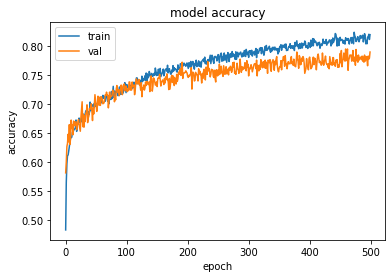

In [ ]:
#plot training accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

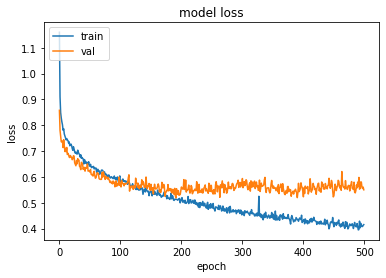

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test_s

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#predict on testing dataset
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.0008)
y_pred_s = model.predict(x_test_norm_s)
y_pred_s.shape, y_test_s.shape

y_test_s = y_test_s.argmax(axis=-1)
print('y_test_s', y_test_s)
y_pred_s = y_pred_s.argmax(axis=-1)
print('y_pred_s',y_pred_s)

y_test_s [3 2 2 2 2 2 1 1 1 1 1 1 1 1 0 2 2 3 3 3 3 2 2 1 1 1 1 1 1 1 1 1 1 1 4 3 3
 2 4 1 0 1 1 1 1 1 1 0 1 1 0 0 1 2 2 4 2 2 2 1 1 1 1 0 1 1 2 1 3 2 2 3 3 2
 3 3 2 1 0 0 1 1 1 1 0 0 0 0 1 2 4 2 1 1 0 1 0 1 0 0 0 0 1 1 1 2 2 2 1 3 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4]
y_pred_s [3 2 2 2 2 2 1 0 0 1 0 0 0 0 1 2 2 2 2 3 3 2 2 1 0 1 1 1 1 1 0 0 1 2 4 3 3
 3 4 0 0 0 0 0 0 0 1 0 1 0 0 1 0 2 2 4 2 1 1 2 1 1 1 0 1 1 2 2 3 2 2 3 3 3
 3 2 3 0 1 0 1 1 0 0 0 0 0 0 2 3 4 2 2 1 0 0 1 0 0 0 0 1 1 0 1 3 2 3 3 3 1
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 3 2 3 1 2 1 2 2 2 2 1 3 2 2 2 3 2 2 2 1 2 2 2 2 2 3 4

In [ ]:
#Compute Recall, precision, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71        61
           1       0.53      0.45      0.49        53
           2       0.68      0.66      0.67        62
           3       0.72      0.75      0.74        76
           4       0.82      0.76      0.79        49

    accuracy                           0.68       301
   macro avg       0.68      0.68      0.68       301
weighted avg       0.68      0.68      0.68       301

